Displacement

In [27]:
import openseespy.opensees as ops
import math
import pandas as pd
def modelCreation(Tn, xi):
    k=1
    wn = 2 * math.pi / Tn  # Natural Frequency
    m = k / wn**2  # Mass
    c = 2* m * wn * xi 
    ops.model('Basic','-ndm',1,'-ndf',1)
    ops.node(1,0)
    ops.node(2,0,'-mass',m)
    ops.fix(1,1)
    mat_tag=1
    ops.uniaxialMaterial('Elastic',mat_tag,k)
    dashpot_tag=2
    alpha=1
    ops.uniaxialMaterial('Viscous', dashpot_tag, c, alpha)

        # Element
    ele_tag1=1
    ele_tag2=2
    ops.element('zeroLength', ele_tag1, 1, 2,'-mat',1,'-dir',1)
    ops.element('zeroLength',ele_tag2,1,2,'-mat',2,'-dir',1)

def groundMotion(file_path):
    ops.timeSeries('Path', 1, '-filePath', file_path, '-dt', 0.005, '-factor', 9.81)
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1)
    ops.constraints('Transformation')

def runAnalysis(steps, timestep):
    ops.numberer('RCM')
    ops.test('NormDispIncr', 1e-6, 10)
    ops.algorithm('Newton')
    ops.system('ProfileSPD')
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')
    t = 0
    stable = 0
    d_max = 0
    duration = steps * timestep
    
    while t < duration:
        stable = ops.analyze(steps, timestep)
        t = ops.getTime()
        d = abs(ops.nodeDisp(2, 1))
        if d > d_max:
            d_max = d
    
    return d_max

def peakDisplacement(Tn, xi,steps,timestep,file_path):
    ops.wipe()
#     timestep = 0.005
#     steps = 64590
    modelCreation(Tn, xi)
    groundMotion(file_path)
    d_max = runAnalysis(steps, timestep)
    return d_max

# Example usage
# print(peakDisplacement(10, 0.05,64590,0.005,'C:/Users/Acer/Desktop/OpenSees/gorkha.txt'))
#setting up loop 
xi=0.05
file_path='C:/Users/Acer/gorkha.txt'
Tn = 0.1
results = []
time=[]
while Tn < 8:
    # Call the peakDisplacement function and store the result
    result = peakDisplacement(Tn, xi, 64590, 0.005, file_path)
    
    # Append the result to the list along with the current Tn value
    results.append({'Tn': Tn, 'Peak Displacement': result})
    
    # Print the current Tn value 
    print(result)
  
    # Increment Tn
    Tn += 0.2

# Convert the list of results to a DataFrame
peak_dfd = pd.DataFrame(results)

# Print the DataFrame
print(peak_dfd)


3.593564674055548e-07
1.0273230145475766e-05
6.197878009243555e-05
7.754156299371688e-07
0.00041710605354834814
0.0003935447916008868
0.0007099859650662405
0.0018856562802041605
0.0006704547175670261
0.0003101339291202071
0.0012767186623331072
0.0026329716923056833
0.0012163056871893748
0.0031433636453743526
0.010119238151803621
0.0009288799000904529
0.0009698257849074103
0.014448213845234212
0.016252053016428805
0.018340858434753936
0.022123051647938475
0.004694016861039207
0.0003959927370646447
0.001866275911765621
0.005030334810262076
0.0063783405872712765
0.00776776039107082
0.007325007197956086
0.004642328709918596
0.003388106376678072
0.003986414738467119
0.004543852134672909
0.0028215936758532218
0.0020823522478285537
0.003717528696184346
0.005825099131618913
0.0041395568886303125
0.0006380894234520027
0.000393892624689412
0.0011999504251464647
     Tn  Peak Displacement
0   0.1       3.593565e-07
1   0.3       1.027323e-05
2   0.5       6.197878e-05
3   0.7       7.754156e-07
4

In [28]:
time=peak_dfd.iloc[:,0]
peak1=peak_dfd.iloc[:,1]
freq=1/time
# print(peak1)
# import matplotlib.pyplot as plt
plt.plot(time,peak1)
plt.show()

acceleration

In [29]:
import openseespy.opensees as ops
import math
import pandas as pd
def modelCreation(Tn, xi):
    k=1
    wn = 2 * math.pi / Tn  # Natural Frequency
    m = k / wn**2  # Mass
    c = 2 * m * wn * xi 
    ops.model('Basic','-ndm',1,'-ndf',1)
    ops.node(1,0)
    ops.node(2,0,'-mass',m)
    ops.fix(1,1)
    mat_tag=1
    ops.uniaxialMaterial('Elastic',mat_tag,k)
    dashpot_tag=2
    alpha=1
    ops.uniaxialMaterial('Viscous', dashpot_tag, c, alpha)

        # Element
    ele_tag1=1
    ele_tag2=2
    ops.element('zeroLength', ele_tag1, 1, 2,'-mat',1,'-dir',1)
    ops.element('zeroLength',ele_tag2,1,2,'-mat',2,'-dir',1)

def groundMotion(file_path):
    ops.timeSeries('Path', 1, '-filePath', file_path, '-dt', 0.005, '-factor', 9.81)
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1)
    ops.constraints('Transformation')

def runAnalysis(steps, timestep):
    ops.numberer('RCM')
    ops.test('NormDispIncr', 1e-6, 10)
    ops.algorithm('Newton')
    ops.system('ProfileSPD')
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')
    t = 0
    stable = 0
    d_max = 0
    duration = steps * timestep
    
    while t < duration:
        stable = ops.analyze(steps, timestep)
        t = ops.getTime()
        d = abs(ops.nodeAccel(2, 1))
        if d > d_max:
            d_max = d
    
    return d_max

def peakAcceleration(Tn, xi,steps,timestep,file_path):
    ops.wipe()
#     timestep = 0.005
#     steps = 64590
    modelCreation(Tn, xi)
    groundMotion(file_path)
    d_max = runAnalysis(steps, timestep)
    return d_max

# Example usage
# print(peakDisplacement(10, 0.05,64590,0.005,'C:/Users/Acer/Desktop/OpenSees/gorkha.txt'))
#setting up loop 
xi=0.02
file_path='C:/Users/Acer/Desktop/OpenSees/gorkha.txt'
Tn = 0.1
results = []
time=[]
while Tn < 8:
    # Call the peakDisplacement function and store the result
    result = peakAcceleration(Tn, xi, 64590, 0.005, file_path)
    
    # Append the result to the list along with the current Tn value
    results.append({'Tn': Tn, 'Peak Accel': result})
    
    # Print the current Tn value (optional)
    print(result)
  
    # Increment Tn
    Tn += 0.2

# Convert the list of results to a DataFrame
peak_df = pd.DataFrame(results)

# Print the DataFrame (optional)
print(peak_df)


0.012392263210943957
0.0015223678364926492
0.04056496167345157
0.008108829349538816
0.025653086354057615
0.045178585955363455
0.035903858591747634
0.058722037884944886
0.029374333758081447
0.0245171540256761
0.030210357348721708
0.015988697850445585
0.032805787899056256
0.02387489830425573
0.07933976367717473
0.07637445692475286
0.07389696439415416
0.08511165524181839
0.056746288700805184
0.031678441546099285
0.0713268848173715
0.04255815480432761
0.014286300447367338
0.004523552711808266
0.011590229796797948
0.0013301323900328334
0.00641050577511476
0.02096300503550985
0.01468505156227079
0.007808623615353342
0.010988504013145706
0.0009610915125324232
0.011212352993507745
0.004032990079759067
0.008088851457595159
3.440101357826809e-05
0.0013575186604672274
0.013134683426628279
0.009417277082369698
0.010506852302181518
     Tn  Peak Accel
0   0.1    0.012392
1   0.3    0.001522
2   0.5    0.040565
3   0.7    0.008109
4   0.9    0.025653
5   1.1    0.045179
6   1.3    0.035904
7   1.5  

In [30]:
time=peak_df.iloc[:,0]
peak=peak_df.iloc[:,1]
# freq=1/time
# sa=peak*9.81
# print(sa)
# import matplotlib.pyplot as plt
plt.plot(time,peak)
plt.show()

In [31]:
# plt.plot(time,peak)
# plt.plot(time,peak1)
# plt.show()
peak.shape
peak1.shape

(40,)

Velocity

In [32]:
import openseespy.opensees as ops
import math
import pandas as pd
def modelCreation(Tn, xi):
    k=1
    wn = 2 * math.pi / Tn  # Natural Frequency
    m = k / wn**2  # Mass
    c = 2* m * wn * xi 
    ops.model('Basic','-ndm',1,'-ndf',1)
    ops.node(1,0)
    ops.node(2,0,'-mass',m)
    ops.fix(1,1)
    mat_tag=1
    ops.uniaxialMaterial('Elastic',mat_tag,k)
    dashpot_tag=2
    alpha=1
    ops.uniaxialMaterial('Viscous', dashpot_tag, c, alpha)

        # Element
    ele_tag1=1
    ele_tag2=2
    ops.element('zeroLength', ele_tag1, 1, 2,'-mat',1,'-dir',1)
    ops.element('zeroLength',ele_tag2,1,2,'-mat',2,'-dir',1)

def groundMotion(file_path):
    ops.timeSeries('Path', 1, '-filePath', file_path, '-dt', 0.005, '-factor', 9.81)
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1)
    ops.constraints('Transformation')

def runAnalysis(steps, timestep):
    ops.numberer('RCM')
    ops.test('NormDispIncr', 1e-6, 10)
    ops.algorithm('Newton')
    ops.system('ProfileSPD')
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')
    t = 0
    stable = 0
    d_max = 0
    duration = steps * timestep
    
    while t < duration:
        stable = ops.analyze(steps, timestep)
        t = ops.getTime()
        d =abs(ops.nodeVel(2, 1))

        if d > d_max:
            d_max = d
    
    return d_max

def peakVelocity(Tn, xi,steps,timestep,file_path):
    ops.wipe()
#     timestep = 0.005
#     steps = 64590
    modelCreation(Tn, xi)
    groundMotion(file_path)
    d_max = runAnalysis(steps, timestep)
    return d_max

# Example usage
# print(peakDisplacement(10, 0.05,64590,0.005,'C:/Users/Acer/Desktop/OpenSees/gorkha.txt'))
#setting up loop 
xi=0.05
file_path='C:/Users/Acer/gorkha.txt'
Tn = 0.1
results = []
time=[]
while Tn < 8:
    # Call the peakDisplacement function and store the result
    result = peakVelocity(Tn, xi, 64590, 0.005, file_path)
    
    # Append the result to the list along with the current Tn value
    results.append({'Tn': Tn, 'Peak Velocity': result})
    
    # Print the current Tn value 
    print(result)
  
    # Increment Tn
    Tn += 0.2

# Convert the list of results to a DataFrame
peak_dfv = pd.DataFrame(results)

# Print the DataFrame
print(peak_dfv)



3.060658763001774e-05
6.061271761903872e-05
0.0004268538943656109
0.0018474441315129775
0.0030348060342934714
0.0012403658204640541
0.003912098045454525
0.001518435506549217
0.0028309995986238144
0.0022730500723043474
0.0019485070967397075
0.0007671807971572082
0.007572679104262955
0.00582184386931774
0.011693528190284071
0.025558582031684218
0.026979508418771527
0.026371546261099246
0.0075673998444660785
0.008668112507002144
0.015880249644330394
0.024166808509064112
0.010993875013377487
0.002926455882554477
0.0029408360695339654
0.0032266339727768725
0.005150478534510264
0.008017014276828523
0.00883960236100715
0.007341098523082466
0.00611873244962897
0.007056102196365789
0.007557878009575753
0.005731377884923961
0.0044974108032460845
0.00602230978439892
0.008769202527961501
0.008371578768112335
0.00678143486311579
0.005965954242054473
     Tn  Peak Velocity
0   0.1       0.000031
1   0.3       0.000061
2   0.5       0.000427
3   0.7       0.001847
4   0.9       0.003035
5   1.1      

In [33]:
# Convert the list of results to a DataFrame
# peak_dfv = pd.DataFrame(results)

# # Print the DataFrame
# print(peak_dfv)

In [34]:
time=peak_dfv.iloc[:,0]
peak2=peak_dfv.iloc[:,1]
# freq=1/time
# sa=peak*9.81
# print(sa)
# import matplotlib.pyplot as plt
plt.plot(time,peak2)
plt.show()

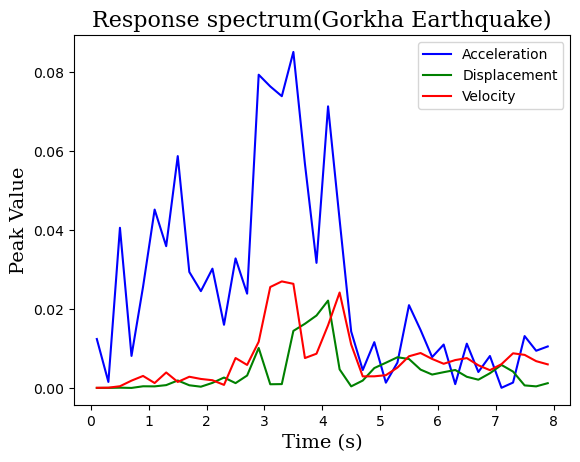

In [35]:
plt.plot(time, peak, label='Acceleration',color='blue')
plt.plot(time, peak1, label='Displacement',color='green')
plt.plot(time, peak2, label='Velocity',color='red')

# Customizing the plot
plt.title('Response spectrum(Gorkha Earthquake)', fontname='serif', fontsize=16)
plt.xlabel('Time (s)', fontname='serif', fontsize=14)
plt.ylabel('Peak Value', fontname='serif', fontsize=14)
plt.legend()
plt.savefig('Response spectrum (GE).png')

# Display the plot
plt.show()
